Test notebook to demonstrate how to open individual files and plot variables without using Coffea. Useful for simple studies.

In [1]:
import uproot
import vector
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
#Fill in the path to individual ffNtuple files here. Running this cell takes a while.
file_path = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleUL/2018/SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6/crab_2018_SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6__230609-062549/230609_112709/0000/ffNtuple_1.root"
file_dict  = {}
file_dict["Sunil_0p24"] = "root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/ffNtuple/2018_v1/SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p24/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p24.root"
file_dict["Sunil_0p024"] = "root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/ffNtuple/2018_v1/SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p024/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p024.root"
file_dict["CentralSample_500_1p2_0p019"] = "../../../../ffNtuple_2Mu2E_500_1p2_0p019.root"
file_dict["CentralSample_500_1p2_9p6"] = "../../../../ffNtuple_2Mu2E_500_1p2_9p6.root"
file_dict["CentralSample_500_1p2_19"] = "../../../../ffNtuple_2Mu2E_500_1p2_19.root"

file_dict["bestGuess_6"] = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleUL/2018/SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6/crab_2018_SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6__230609-062549/230609_112709/0000/ffNtuple_1.root"
file_dict["bestGuess_60"] = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleUL/2018/SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-60/crab_2018_SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-60__230609-062549/230609_112637/0000/ffNtuple_1.root"


temp_file = uproot.open(file_path)


branches_dict = {}

for file_name in file_dict:
    print("Opening ",file_dict[file_name])
    temp_file = uproot.open(file_dict[file_name])
    tree = temp_file['ffNtuplizer/ffNtuple']
    #Load all the branches into memory and store in branches_dict (this is slow, and could be done in a 
    #"lazy" way to only read the arrays that we end up using, but I'm too lazy to be lazy)
    branches_dict[file_name] = tree.arrays()

Opening  root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/ffNtuple/2018_v1/SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p24/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p24.root
Opening  root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/ffNtuple/2018_v1/SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p024/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-1000_MDp-0p3_ctau-0p024.root
Opening  ../../../../ffNtuple_2Mu2E_500_1p2_0p019.root
Opening  ../../../../ffNtuple_2Mu2E_500_1p2_9p6.root
Opening  ../../../../ffNtuple_2Mu2E_500_1p2_19.root
Opening  root://xcache//store/group/lpcmetx/SIDM/ffNtupleUL/2018/SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6/crab_2018_SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-6__230609-062549/230609_112709/0000/ffNtuple_1.root
Opening  root://xcache//store/group/lpcmetx/SIDM/ffNtupleUL/2018/SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-60/crab_2018_SIDM_UL_bestGuess_BsTo2DpTo2Mu2e_MBs-100_MDp-0p8_ctau-60__230609-062549/230609_112637/0000/ffNtup

In [ ]:
#Explore the branches in the files
tree.keys("gen*")

In [ ]:
print(branches_dict["bestGuess_6"]["muon_d0"][:1])

In [ ]:
for file_name in file_dict:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    muon_LJs_mask = (branches["pfjet_muon_n"] > 0)
    plt.hist(
        abs(
            ak.flatten(ak.flatten(
                branches["pfjet_pfcand_tkD0"][muon_LJs_mask]))), 
        bins=50, range=(0, 0.01), label = file_name,histtype='step',density=True)
plt.legend()
plt.show()


Processing  Sunil_0p24
Processing  Sunil_0p024
Processing  CentralSample_500_1p2_0p019
Processing  CentralSample_500_1p2_9p6
Processing  CentralSample_500_1p2_19
Processing  bestGuess_6
Processing  bestGuess_60


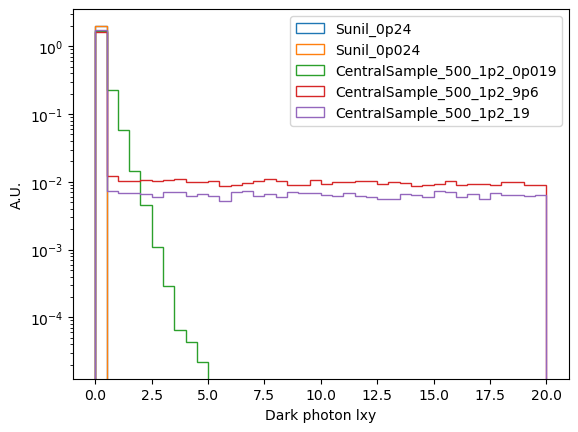

In [6]:
for file_name in file_dict:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    
    if "best" in file_name:
        continue
    
    gen_dp_mask = abs(branches["gen_pid"]) == 32
    
    gen_dauvtx_vec = vector.zip({"x": branches['gen_dauvtx.fCoordinates.fX'],
                          "y": branches['gen_dauvtx.fCoordinates.fY'],
                          "z": branches['gen_dauvtx.fCoordinates.fZ']})
    
    gen_vtx_vec = vector.zip({"x": branches['gen_vtx.fCoordinates.fX'],
                          "y": branches['gen_vtx.fCoordinates.fY'],
                          "z": branches['gen_vtx.fCoordinates.fZ']})
  
    plt.hist(ak.flatten(abs((gen_dauvtx_vec - gen_vtx_vec).rho)), bins=40, range=(0, 20), label = file_name,histtype='step',density=True)
    #   plt.hist(
 #           ak.flatten(
 #               branches["pfjet_pfcand_tkD0"][muon_LJs_mask]))), 
  #      bins=50, range=(0, 0.01), label = file_name,histtype='step',density=True)

   #(p.dauvtx-p.vtx).Rho()#

plt.xlabel('Dark photon lxy')
plt.ylabel('A.U.')
plt.yscale("log")
plt.legend()
plt.show()

In [5]:
branches = branches_dict["Sunil_0p24"]

gen_dp_mask = abs(branches["gen_pid"]) == 32
    
gen_dauvtx_vec = vector.zip({"x": branches['gen_dauvtx.fCoordinates.fX'],
                          "y": branches['gen_dauvtx.fCoordinates.fY'],
                          "z": branches['gen_dauvtx.fCoordinates.fZ']})
    
gen_vtx_vec = vector.zip({"x": branches['gen_vtx.fCoordinates.fX'],
                          "y": branches['gen_vtx.fCoordinates.fY'],
                          "z": branches['gen_vtx.fCoordinates.fZ']})

print((gen_vtx_vec)[gen_dp_mask].rho)
print((gen_dauvtx_vec)[gen_dp_mask].rho)
x = (gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].x
y = (gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].y
z = (gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].z

print(type(gen_dauvtx_vec - gen_vtx_vec))

print("x",x)
print("y",y)
print("z",z)
print("rho",(gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].rho)
#print("r",(gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].r)

#print(sqrt((gen_dauvtx_vec - gen_vtx_vec)[gen_dp_mask].rho)

[[0.0428, 0.0428], [0.0428, 0.0428], ... [0.0434, 0.0434], [0.0426, 0.0426]]
[[0.0428, 0.0428], [0.0428, 0.0428], ... [0.0434, 0.0434], [0.0426, 0.0426]]
<class 'vector.backends.awkward.VectorArray3D'>
x [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
y [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
z [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
rho [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [ ]:
    plt.hist(branches["muon_d0"][:,:1], bins=50, range=(-0.01, 0.01), label = file_name,histtype='step',density=True)

# Select muon LJs

In [ ]:
branches = branches_dict["ffNtuple_1.root"]

In [ ]:
muon_LJs_mask = (branches["pfjet_muon_n"] > 0)

In [ ]:
branches["pfjet_pfcand_tkD0"][muon_LJs_mask][:10,:].tolist()

In [ ]:
ak.flatten(ak.flatten(branches["pfjet_pfcand_tkD0"][muon_LJs_mask]))

In [ ]:
plt.hist(
    abs(ak.flatten(ak.flatten(branches["pfjet_pfcand_tkD0"][muon_LJs_mask]))), bins=50, range=(0, 0.01), label = file_name,histtype='step',density=True)


# Old code

In [ ]:
#Plot the invariant mass of the reconstructed muon pair (should peak at the dark photon mass)

for file_name in file_names:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    
    #Create a vector object for the muons
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                          "py": branches['muon_p4.fCoordinates.fY'],
                          "pz": branches['muon_p4.fCoordinates.fZ'],
                          "t": branches['muon_p4.fCoordinates.fT']})
    
    #Apply quality cuts to muons (could add more here)
    good_muon_mask = (muon_p4.pt > 5) & (abs(muon_p4.eta) < 2.4) #muon level mask
    
    #Apply the mask
    good_muons = muon_p4[good_muon_mask]
    
    #Select events with at least two good muons
    two_muons_mask = ak.count(good_muons.pt,1) >= 2 #event level mask
    two_muons_p4 = good_muons[two_muons_mask]
    
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 #event level quantity
    two_muons_charges = branches['muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1] #event level mask
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    plt.hist(dimuon_p4.mass, bins=50, range=(0, 10), label = file_name,histtype='step',density=True)
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('A.U.')
plt.title('Invariant mass of reco muon pair')
plt.legend(loc = 'upper right')

In [ ]:
#Plot the invariant mass of the gen muon pair (should peak at the dark photon mass)

for file_name in file_names:
    print("Processing ",file_name)
    branches = branches_dict[file_name]
    
    #Create a vector object for the gen particles
    gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                          "py": branches['gen_p4.fCoordinates.fY'],
                          "pz": branches['gen_p4.fCoordinates.fZ'],
                          "t": branches['gen_p4.fCoordinates.fT']}  )
    
    #Select gen muons 
    # (since we are using gen muons and the 2Mu2E files, we are guaranteed to have exactly 2 muons per event)
    gen_muon_mask = abs(branches["gen_pid"]) == 13
    gen_muon_p4 = gen_p4[gen_muon_mask]

    gen_muon_sum_p4 = gen_muon_p4[:, 0] + gen_muon_p4[:, 1]   

    plt.hist(gen_muon_sum_p4.mass, bins=50, range=(0, 10), label = file_name,histtype='step',density=True)
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('A.U.')
plt.title('Invariant mass of gen muon pair')
plt.legend(loc = 'upper right')